# Mapping
***


This is an exploration of mapping using Python and various libraries for mapping.

In [3]:
# import geopandas library
import geopandas as gpd

In [4]:
# define the path to the shapefile
shape = "./geospatial_files/IRL_adm1.shp"

Note that both the .shp file and the .shx file have to be in the same directory. It won't work with only the shp file. What is the shx file?

In [5]:
# read in shapefiles with geopandas
sf = gpd.read_file(shape)

<Axes: >

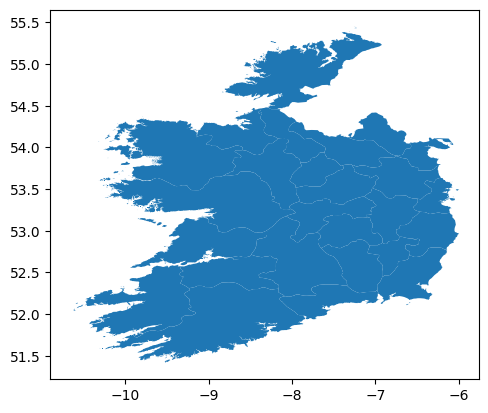

In [6]:
# plot the shapefile
sf.plot()

In [73]:
# Check the current CRS (Coordinate Reference System)
print(sf.crs)

EPSG:3857


Maybe we could read in some data and plot that on the map. I'd like to get plot the location of every hospital in Ireland. I created a csv file containing the latitude and longitude of each hospital. We can load the dataset using Pandas.

In [7]:
# import pandas library
import pandas as pd

In [10]:
# read in csv dataset using pandas and create a dataframe
df = pd.read_csv("ire_hospitals.csv")

Now that the dataset is loaded, we can do some stuff.

In [27]:
# view a small version of the dataframe
df

name        lat       lon
0                      Children's Health Ireland   53.326179 -6.318904
1                          Naas General Hospital   53.211413 -6.661404
2           Midland Regional Hospital Portlaoise   53.037821 -7.275367
3            Midland Regional Hospital Tullamore   53.283128 -7.488550
4                           St. James's Hospital   53.340097 -6.295563
5                   Tallaght University Hospital   53.291193 -6.378828
6                      St. Columcille's Hospital   53.242354 -6.132517
7            Midland Regional Hospital Mullingar   53.534411 -7.349006
8                      Our Lady's Hospital Navan   53.650193 -6.698165
9           St. Luke's General Hospital Kilkenny   52.666460 -7.262816
10                      Wexford General Hospital   52.343168 -6.483022
11       Mater Misericordiae University Hospital   53.359226 -6.267059
12             St. Vincent's University Hospital   53.316841 -6.212796
13           Royal Victoria Eye and Ear Hospital   53.332833 -6.255942
14         National Orthopaedic Hospital Cappagh   53.393845 -6.326800
15              Connolly Hospital Blanchardstown   53.388968 -6.367831
16                         Louth County Hospital   53.987872 -6.400656
17                        Cavan General Hospital   54.001006 -7.371899
18         Our Lady of Lourdes Hospital Drogheda   53.722136 -6.354292
19                             Beaumont Hospital   53.389487 -6.224729
20                              Rotunda Hospital   53.353003 -6.263468
21               Letterkenny University Hospital   54.960032 -7.734636
22                   Galway University Hospitals   53.276954 -9.066692
23                      Mayo University Hospital   53.850752 -9.302294
24                 University Hospital Waterford   52.248997 -7.078163
25              South Tipperary General Hospital   52.355723 -7.714943
26                       Mallow General Hospital   52.151503 -8.663696
27                       Bantry General Hospital   51.676273 -9.450125
28                      Cork University Hospital   51.883383 -8.512064
29            Cork University Maternity Hospital   51.882396 -8.510839
30                     University Hospital Kerry   52.265801 -9.687430
31                     Mercy University Hospital   51.898982 -8.482432
32  South Infirmary Victoria University Hospital   51.893467 -8.463761
33                  University Hospital Limerick   52.634211 -8.653155
34                    Croom Orthopaedic Hospital   52.527064 -8.711885
35                               Nenagh Hospital   52.857828 -8.191004
36                                Ennis Hospital   52.851092 -8.983232
37                  St. John's Hospital Limerick   52.663362 -8.616857

If we want to plot those points on the map generated earlier wit geopandas, we have to convert the pandas dataframe containing the hospital information into points.
We can use geopandas to convert "lat" and "lon" in the dataframe to points.

In [11]:
# this gives us a new "geodataframe"
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lon, df.lat))

In [12]:
# import matplotlib that can do subplots
import matplotlib.pyplot as plt

<Axes: >

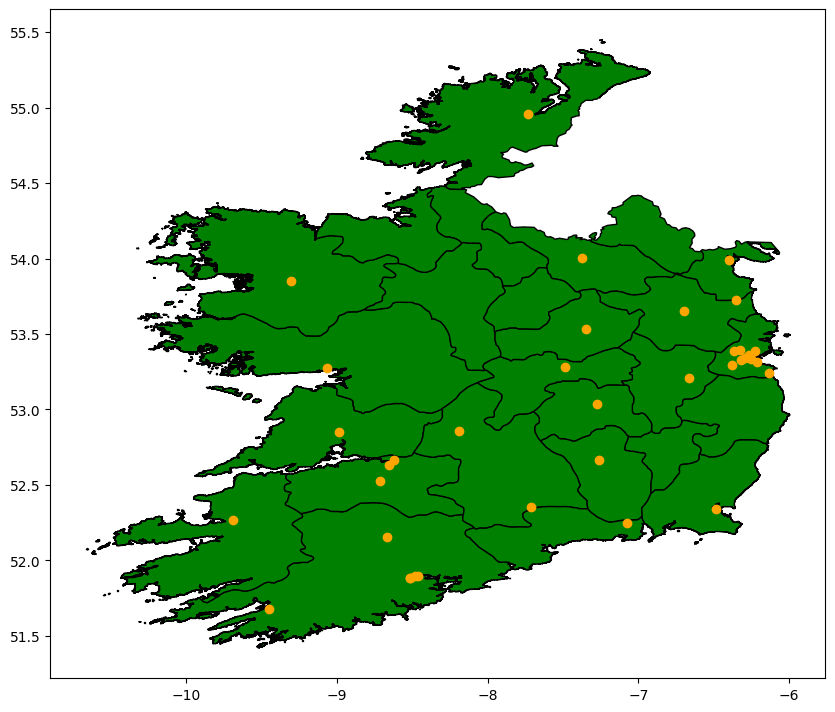

In [29]:
# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

I'd like to color the sea blue.

<Axes: >

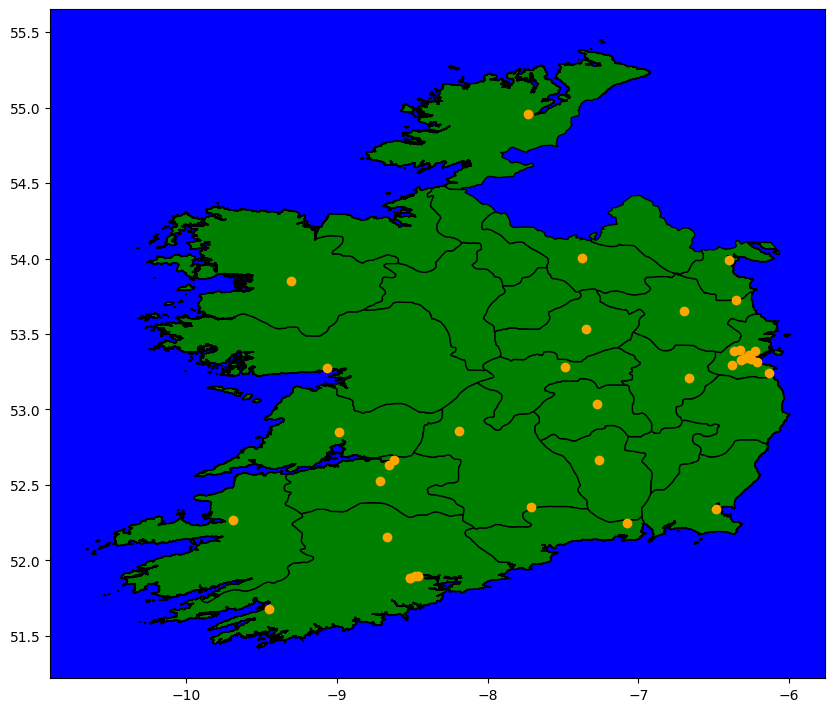

In [30]:
# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# set the background color of the plot to blue
ax.set_facecolor('blue')

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

Northern Ireland is missing. We need to find a shapefile for northern ireland and plot that as well.

<Axes: >

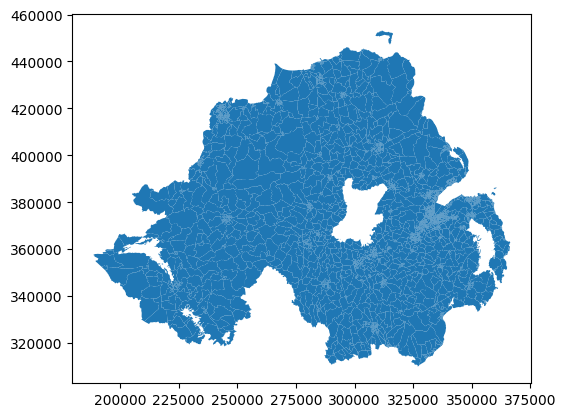

In [60]:
# define the path to the shapefile
shape_ni = "./geospatial_files/DZ2021.shp"

# read in shapefiles with geopandas
sf_ni = gpd.read_file(shape_ni)

sf_ni.plot()

How do we combine them? Notice the werid axes units. Its not lat and long.

<Axes: >

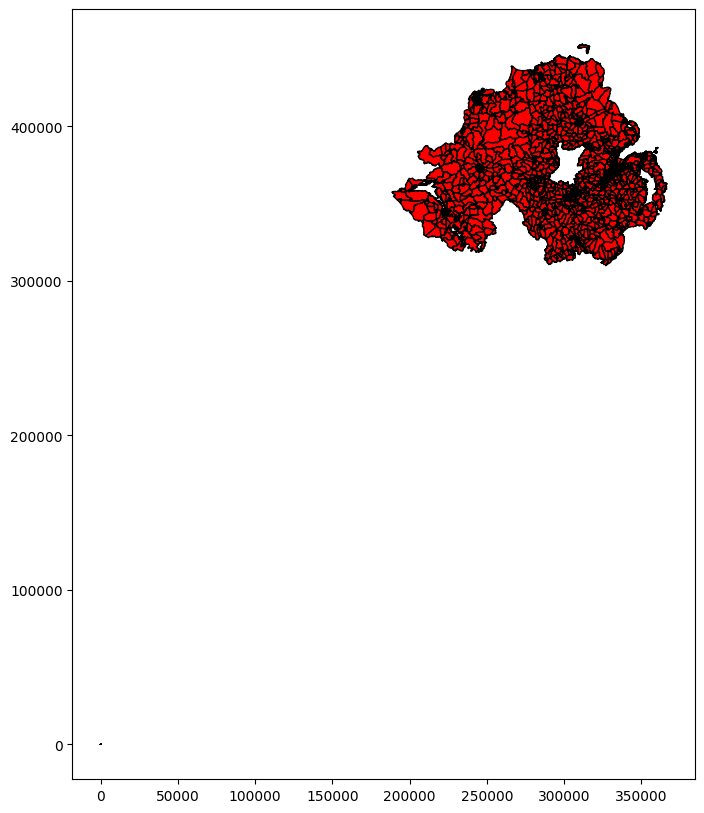

In [33]:
# Plot both shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# Plot the second shapefile
sf_ni.plot(ax=ax, color='red', edgecolor='black')

None


<Axes: >

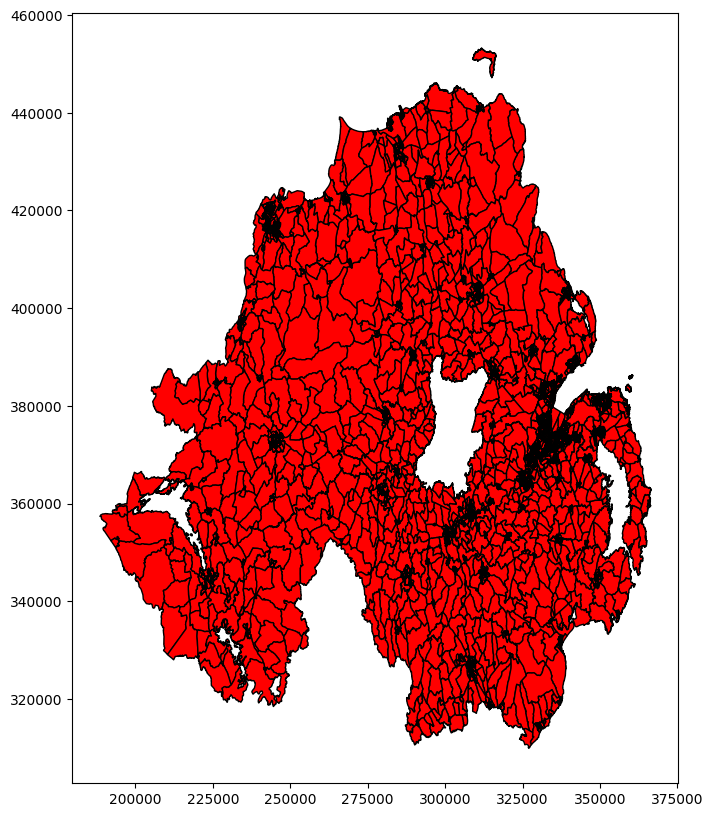

In [63]:
# convert NI map to lat and long

# define the path to the shapefile
shape_ni = "./geospatial_files/DZ2021.shp"

# read in shapefiles with geopandas
sf_ni = gpd.read_file(shape_ni)

# Check the current CRS (Coordinate Reference System)
print(sf_ni.crs)

# Reproject to a geographic CRS (e.g., WGS84)
sf_ni.set_crs("epsg:4326", inplace=True)

# Plot both shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first shapefile
#sf.plot(ax=ax, color='green', edgecolor='black')

# Plot the second shapefile
sf_ni.plot(ax=ax, color='red', edgecolor='black')

Scale is messed up. I found a site that had all the counties already in one shapefile.

- https://www.townlands.ie/page/download/

<Axes: >

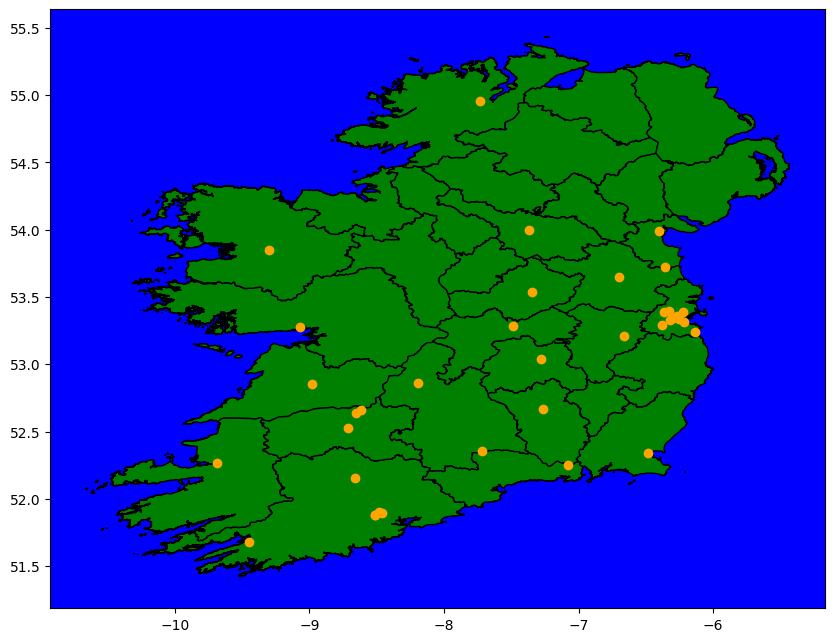

In [77]:
# define the path to the shapefile
shape = "./geospatial_files/counties/counties.shp"

# read in shapefiles with geopandas
sf = gpd.read_file(shape)

# create a figure and and axis for plotting on
fig, ax = plt.subplots(figsize=(10, 10))

# set the background color of the plot to blue
ax.set_facecolor('blue')

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

Now try some heatmap stuff.

In [17]:
#  import some tools
from sklearn.neighbors import BallTree
import numpy as np
from matplotlib.colors import LinearSegmentedColormap  # Import LinearSegmentedColormap


/tmp/ipykernel_23348/4231168498.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf['centroid'] = sf['geometry'].centroid


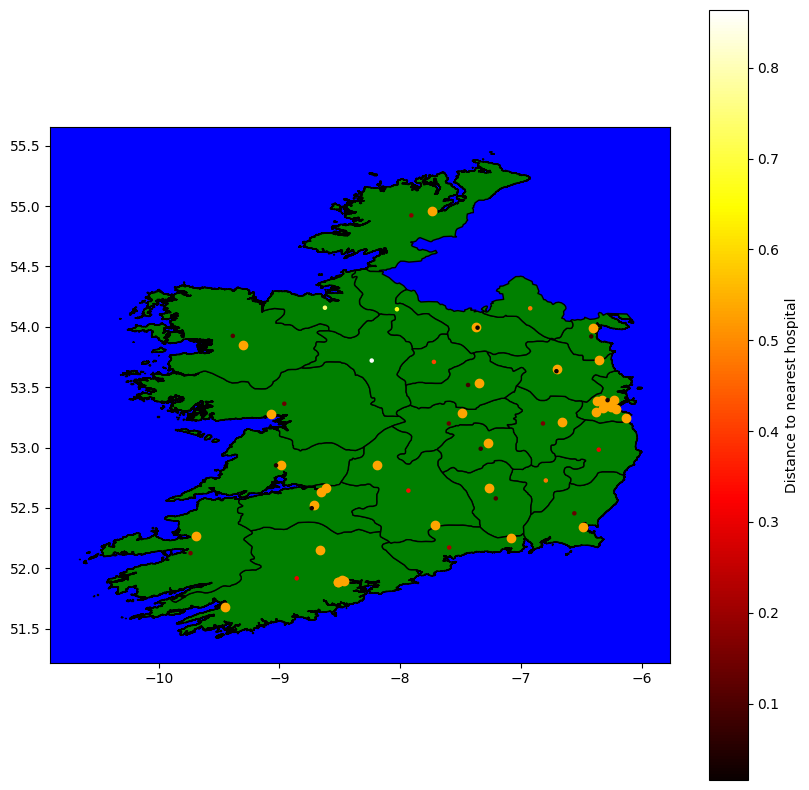

In [18]:
# calculate the centroids of each polygon in sf_all_ire
sf['centroid'] = sf['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))

# set the background color of the plot to blue
ax.set_facecolor('blue')

# plot the shapefile
sf.plot(ax=ax, color='green', edgecolor='black')

# plot the GeoDataFrame
df_geo.plot(ax=ax, color='orange')

# plot the heatmap
plt.scatter(sf['centroid'].x, sf['centroid'].y, c=distances, cmap='hot', s=5)
plt.colorbar(label='Distance to nearest hospital')

plt.show()



/tmp/ipykernel_23348/2946376509.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf['centroid'] = sf['geometry'].centroid


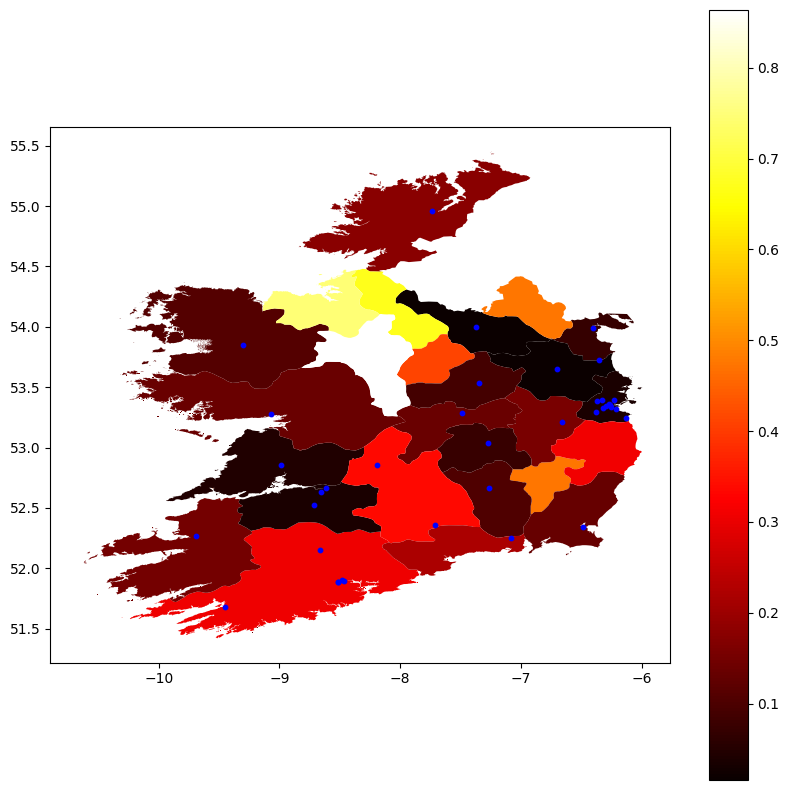

In [19]:
# calculate the centroids of each polygon in sf_all_ire
sf['centroid'] = sf['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# create a Series with the distances and their corresponding indices
nearest_distances = pd.Series(distances.ravel(), index=sf.index)

# add the nearest distance as a new column in the GeoDataFrame
sf['nearest_distance'] = nearest_distances

# plot the map with color based on distance to nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance
sf.plot(ax=ax, column='nearest_distance', cmap='hot', legend=True)

# plot the hospitals
df_geo.plot(ax=ax, color='blue', markersize=10)

plt.show()


/tmp/ipykernel_23348/3687191355.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf['centroid'] = sf['geometry'].centroid


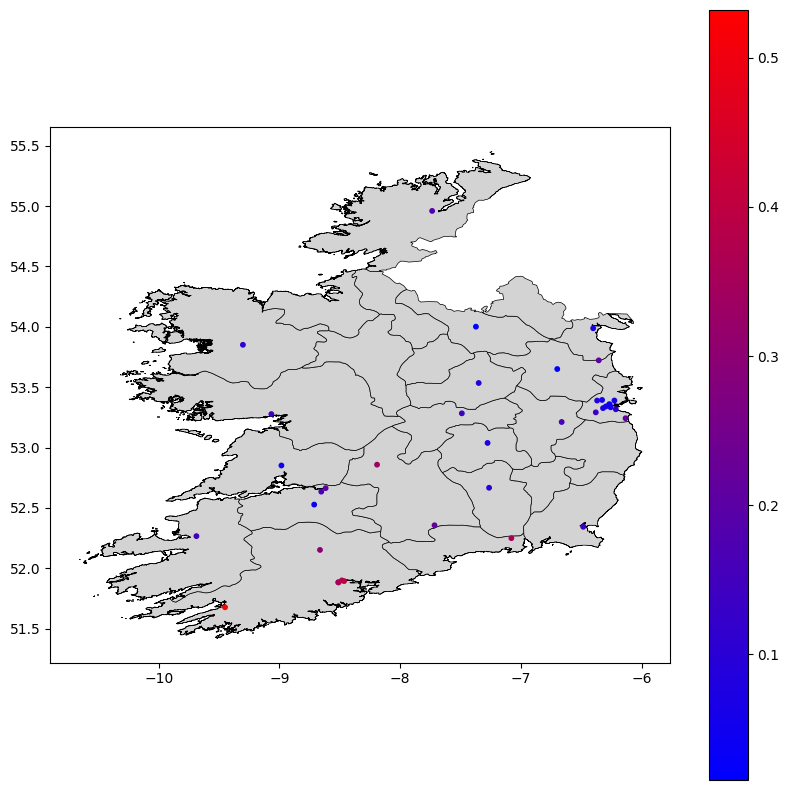

In [20]:
# read in shapefiles with geopandas and set CRS
sf = gpd.read_file(shape).set_crs(epsg=4326)

# calculate the centroids of each polygon in sf_all_ire
sf['centroid'] = sf['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(centroids, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(hospital_coords, k=1)

# add the distances as a new column in the DataFrame
df_geo['nearest_distance'] = distances

# define a colormap from blue to red
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# plot the map with color based on distance to nearest hospital as a gradient
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
df_geo.plot(ax=ax, column='nearest_distance', cmap=cmap_gradient, legend=True, markersize=10)

plt.show()


/tmp/ipykernel_23348/2437802852.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf['centroid'] = sf['geometry'].centroid


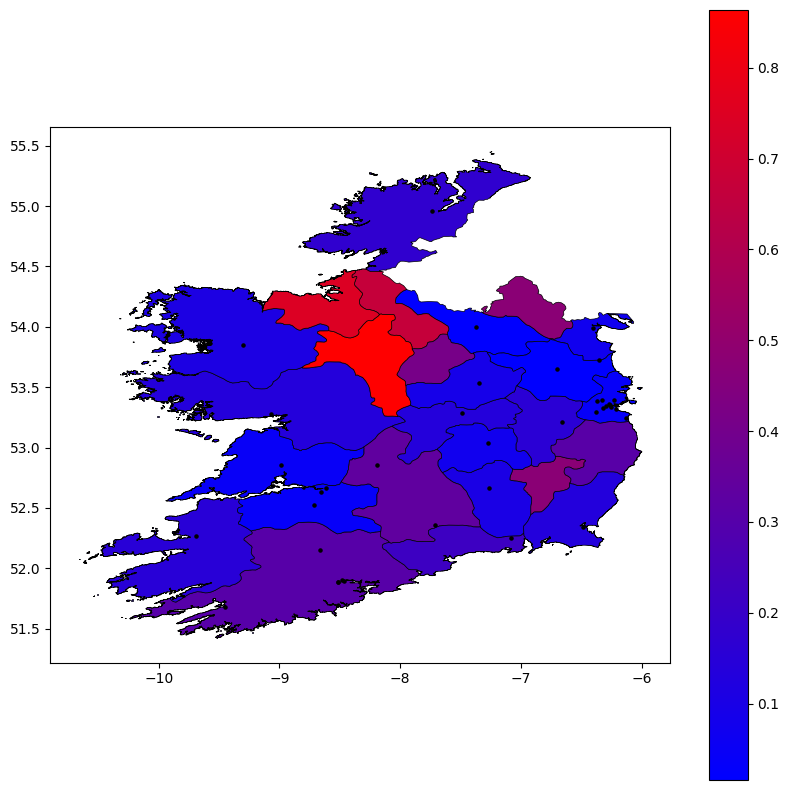

In [22]:
# read in shapefiles with geopandas and set CRS
sf = gpd.read_file(shape).set_crs(epsg=4326)

# calculate the centroids of each polygon in sf_all_ire
sf['centroid'] = sf['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf['nearest_distance'] = distances

# define a colormap for the base map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf.plot(ax=ax, column='nearest_distance', cmap=cmap_gradient, legend=True, edgecolor='black', linewidth=0.5)

# plot the hospitals as black points
df_geo.plot(ax=ax, color='black', markersize=5)

plt.show()


/tmp/ipykernel_5870/1656112918.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid


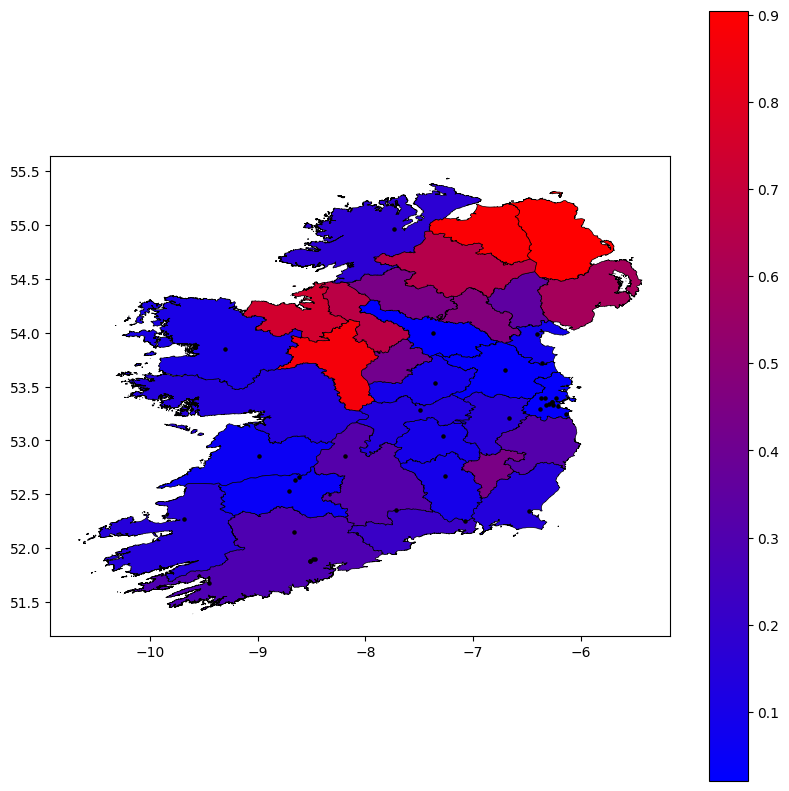

In [40]:
# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))



# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='nearest_distance', cmap=cmap_gradient, legend=True, edgecolor='black', linewidth=0.5)

# plot the hospitals as black points
df_geo.plot(ax=ax, color='black', markersize=5)

plt.show()


/tmp/ipykernel_23348/3409700967.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid


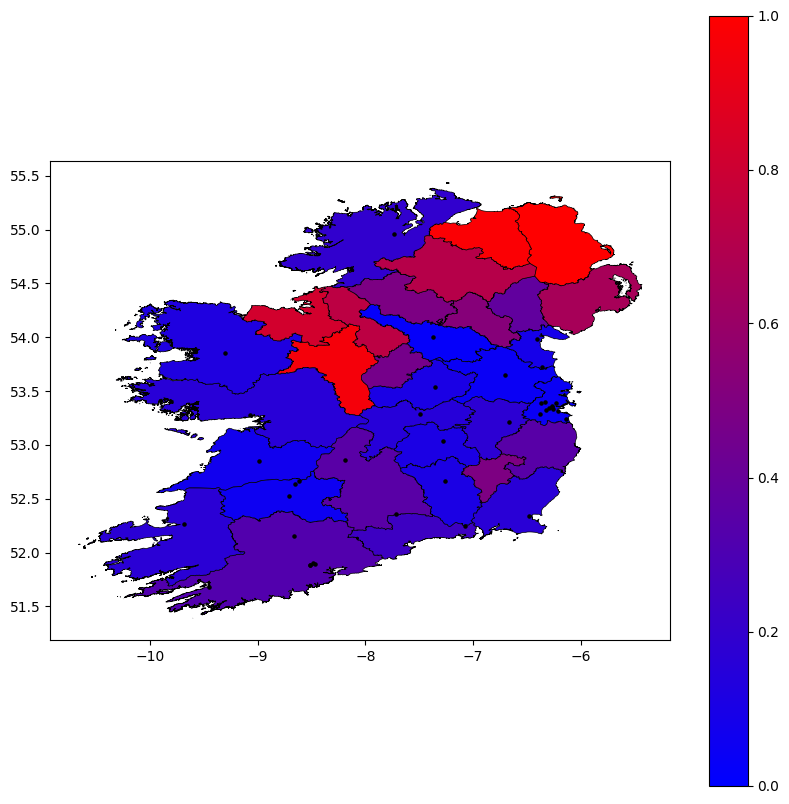

In [23]:

from matplotlib.colors import Normalize

# read in csv dataset using pandas and create a dataframe
df = pd.read_csv("ire_hospitals.csv")
# create a GeoDataFrame from the dataframe
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# define the path to the shapefile
shape_all_ire = "./geospatial_files/counties/counties.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

# plot the hospitals as black points
df_geo.plot(ax=ax, color='black', markersize=5)

plt.show()


/tmp/ipykernel_5870/791049015.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid


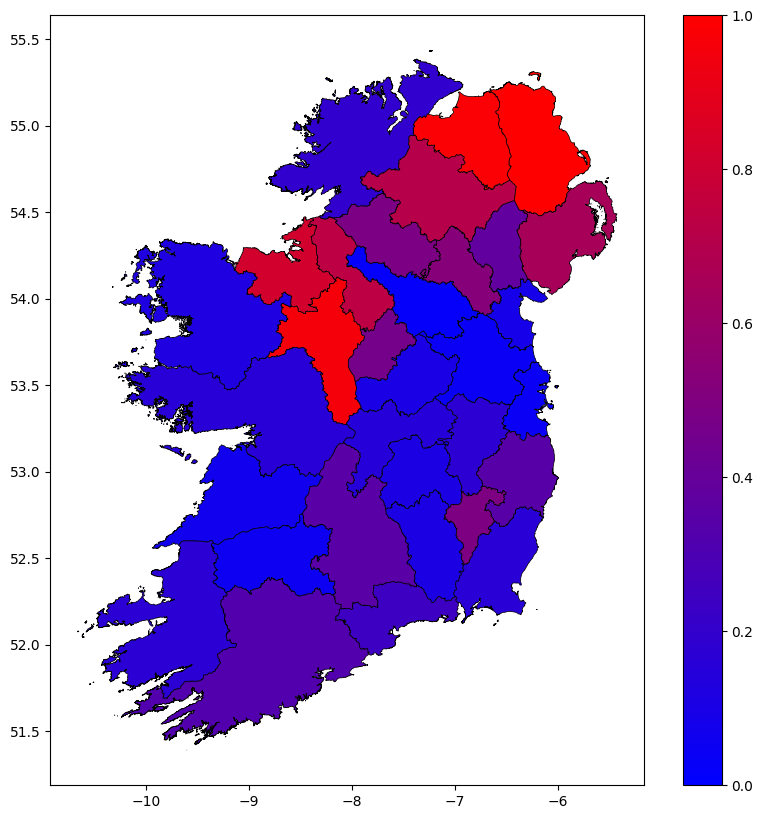

In [28]:
# read in csv dataset using pandas and create a dataframe
df = pd.read_csv("ire_hospitals.csv")
# create a GeoDataFrame from the dataframe
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# define the path to the shapefile
shape_all_ire = "./geospatial_files/counties/counties.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

plt.show()


/tmp/ipykernel_5870/791049015.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid


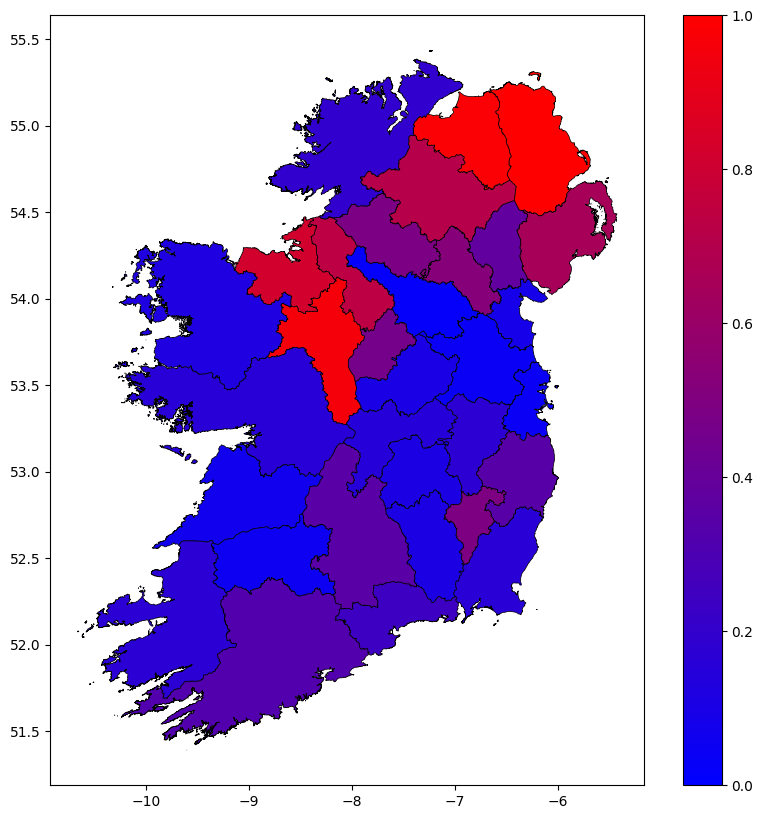

In [36]:
# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

plt.show()


It appears that the shapefile is not detailed enough to apply color gradeint to each county.

Interpolation?

Lets try with a more detailed shapefile.

- https://www.geohive.ie/datasets/f055352696d04eaaa2618518342c4ef5_0/explore

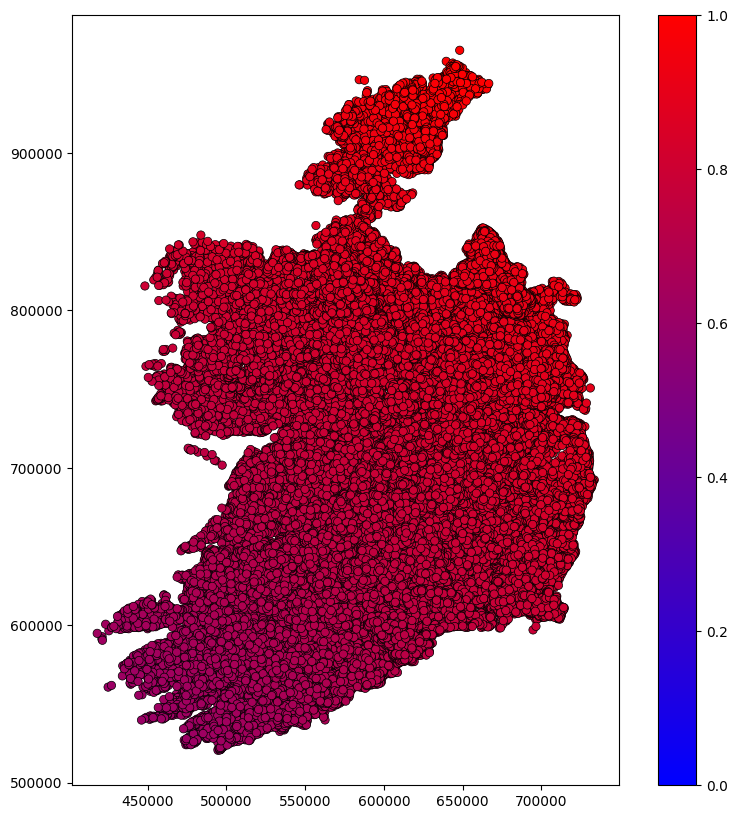

In [44]:
# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

plt.show()


Something weird going on there. Maybe just plot the basic shapefile first and see whats up.

<Axes: >

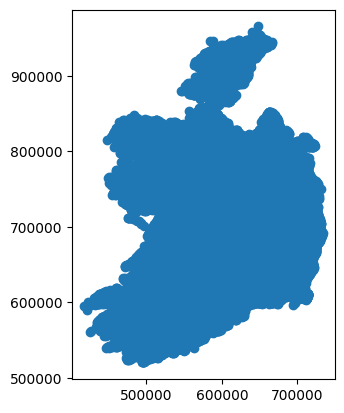

In [49]:
# define the path to the shapefile
shape_all_ire = "./geospatial_files/Townlands_-_National_Placenames_Gazetteer/Townlands___National_Placenames_Gazetteer.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# plot the shapefile
sf_all_ire.plot()

<Axes: >

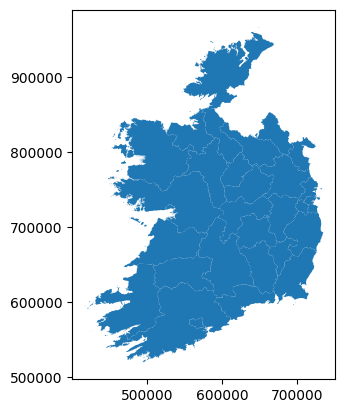

In [48]:
# define the path to the shapefile
shape_all_ire = "./geospatial_files/Administrative_Areas_-_National_Statutory_Boundaries_-_2019/Administrative_Areas___Ungen_2019.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# plot the shapefile
sf_all_ire.plot()

<Axes: >

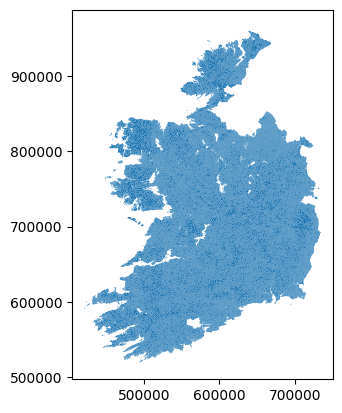

In [50]:
# define the path to the shapefile
shape_all_ire = "./geospatial_files/Townlands_-_National_Statutory_Boundaries_-_2019/Townlands___Ungen_2019.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# plot the shapefile
sf_all_ire.plot()



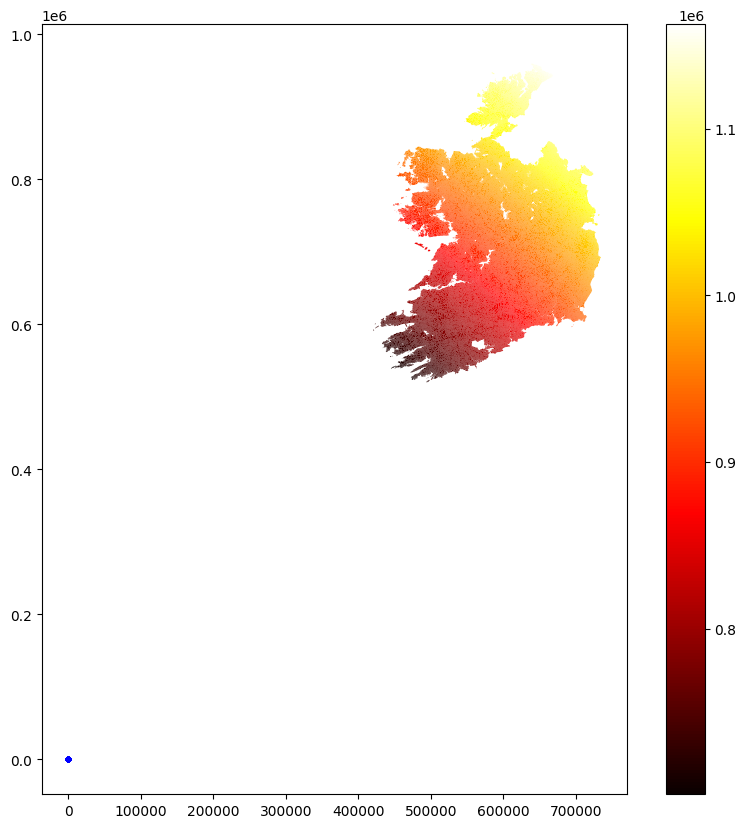

In [51]:
# calculate the centroids of each polygon in sf_all_ire
sf['centroid'] = sf['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# create a Series with the distances and their corresponding indices
nearest_distances = pd.Series(distances.ravel(), index=sf.index)

# add the nearest distance as a new column in the GeoDataFrame
sf['nearest_distance'] = nearest_distances

# plot the map with color based on distance to nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance
sf.plot(ax=ax, column='nearest_distance', cmap='hot', legend=True)

# plot the hospitals
df_geo.plot(ax=ax, color='blue', markersize=10)

plt.show()


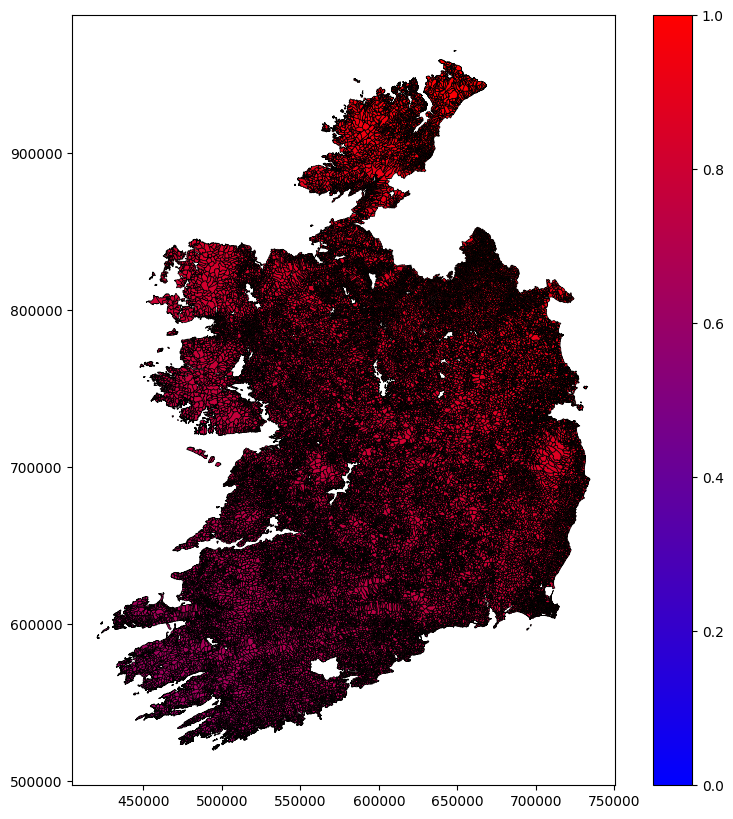

In [52]:
# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

plt.show()


The maps has weird numbers on axes. Maybe have to convert the shape to lat and long to match the hospital data. Something about CRS.

EPSG:2157


<Axes: >

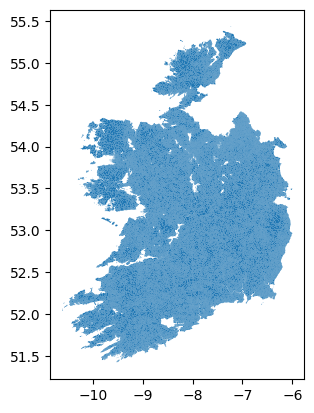

In [53]:
# define the path to the shapefile
shape_all_ire = "./geospatial_files/Townlands_-_National_Statutory_Boundaries_-_2019/Townlands___Ungen_2019.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# Check the current CRS (Coordinate Reference System)
print(sf_all_ire.crs)

# Reproject to a geographic CRS (e.g., WGS84)
sf_all_ire = sf_all_ire.to_crs("EPSG:4326")

# plot the shapefile
sf_all_ire.plot()



EPSG:2157


/tmp/ipykernel_5870/3639253882.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid


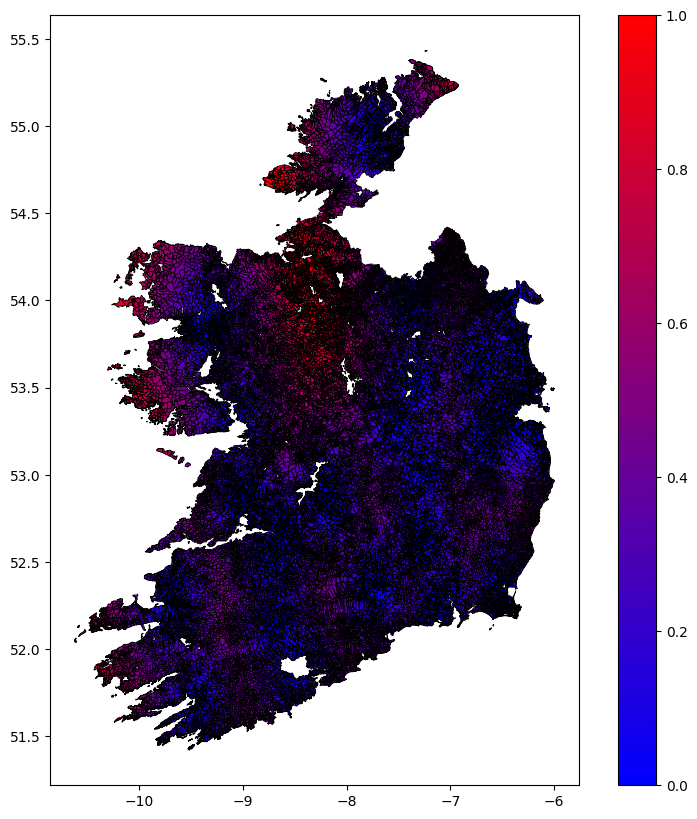

In [55]:
# Check the current CRS (Coordinate Reference System)
print(sf_all_ire.crs)

# Reproject to a geographic CRS (e.g., WGS84)
sf_all_ire = sf_all_ire.to_crs("EPSG:4326")

# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

plt.show()


EPSG:2157


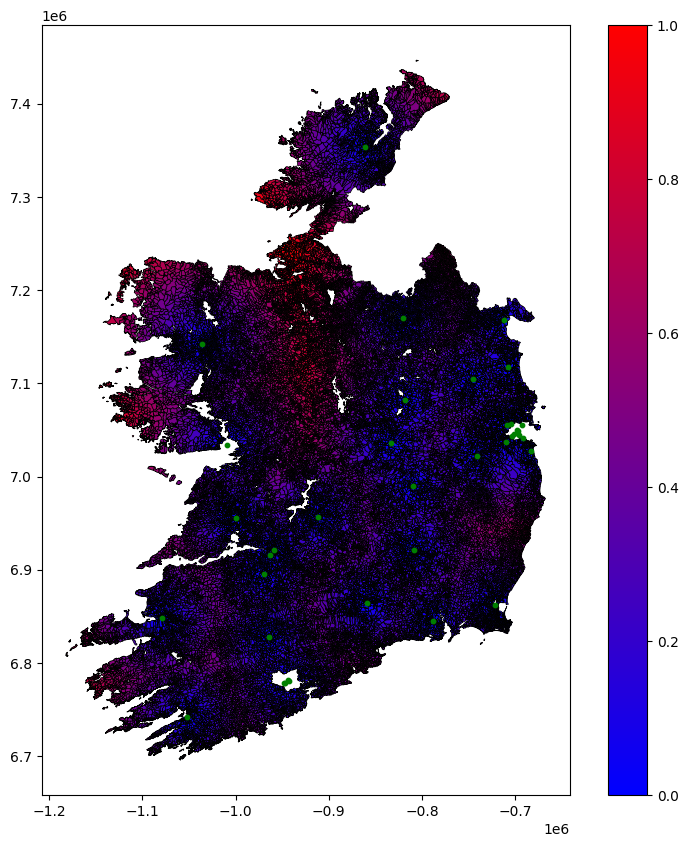

In [66]:
d_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Define the CRS for the hospitals GeoDataFrame (WGS84)
df_geo.crs = "EPSG:4326"

# Reproject hospitals to Web Mercator (EPSG:3857)
df_geo = df_geo.to_crs("EPSG:3857")

# define the path to the shapefile
shape_all_ire = "./geospatial_files/Townlands_-_National_Statutory_Boundaries_-_2019/Townlands___Ungen_2019.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# Check the current CRS (Coordinate Reference System)
print(sf_all_ire.crs)

# Reproject to Web Mercator (EPSG:3857)
sf_all_ire = sf_all_ire.to_crs("EPSG:3857")

# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

# plot the hospitals
df_geo.plot(ax=ax, color='green', markersize=10)

plt.show()


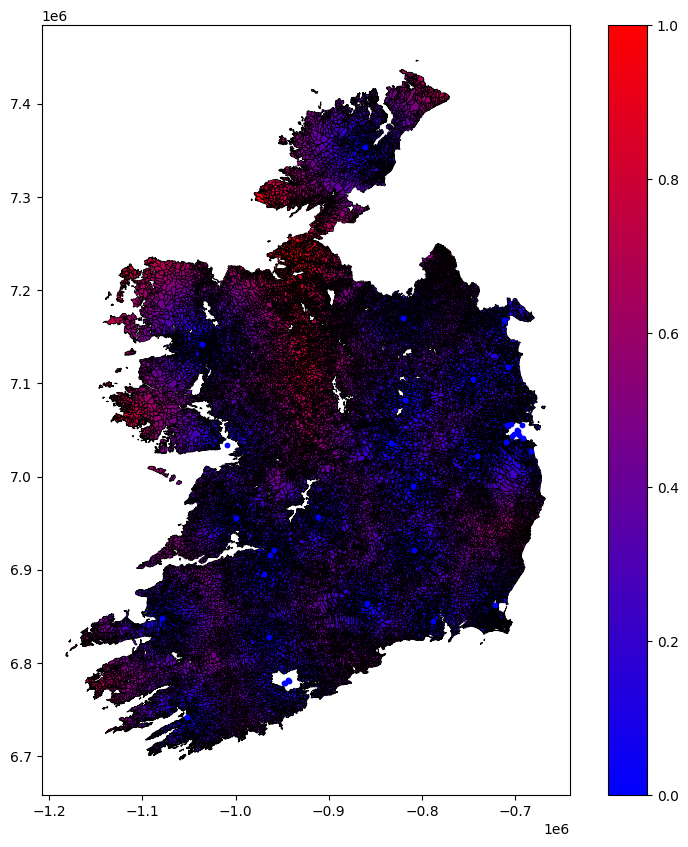

In [67]:


# Define the CRS for the hospitals GeoDataFrame (WGS84)
df_geo.crs = "EPSG:4326"

# Reproject hospitals to Web Mercator (EPSG:3857)
df_geo = df_geo.to_crs("EPSG:3857")

# define the path to the shapefile
shape_all_ire = "./geospatial_files/Townlands_-_National_Statutory_Boundaries_-_2019/Townlands___Ungen_2019.shp"

# read in the shapefile with geopandas
sf_all_ire = gpd.read_file(shape_all_ire)

# Reproject to Web Mercator (EPSG:3857)
sf_all_ire = sf_all_ire.to_crs("EPSG:3857")

# calculate the centroids of each polygon in sf_all_ire
sf_all_ire['centroid'] = sf_all_ire['geometry'].centroid

# extract the centroids
centroids = np.column_stack((sf_all_ire['centroid'].x, sf_all_ire['centroid'].y))

# extract the hospital coordinates
hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
distances, indices = tree.query(centroids, k=1)

# add the distances as a new column in the GeoDataFrame
sf_all_ire['nearest_distance'] = distances

# find the maximum distance
max_distance = sf_all_ire['nearest_distance'].max()

# normalize the distances to a range between 0 and 1
sf_all_ire['normalized_distance'] = sf_all_ire['nearest_distance'] / max_distance

# define a colormap for the map based on the gradient of distances
cmap_gradient = LinearSegmentedColormap.from_list('custom_gradient', [(0, 0, 1), (1, 0, 0)], N=256)

# normalize the colors
norm = Normalize(vmin=0, vmax=1)

# plot the map with color based on a gradient of distance to the nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# plot the GeoDataFrame with color based on distance using a gradient
sf_all_ire.plot(ax=ax, column='normalized_distance', cmap=cmap_gradient, norm=norm, legend=True, edgecolor='black', linewidth=0.5)

# plot the hospitals
df_geo.plot(ax=ax, color='blue', markersize=10)

plt.show()


EPSG:2157
EPSG:4326
None


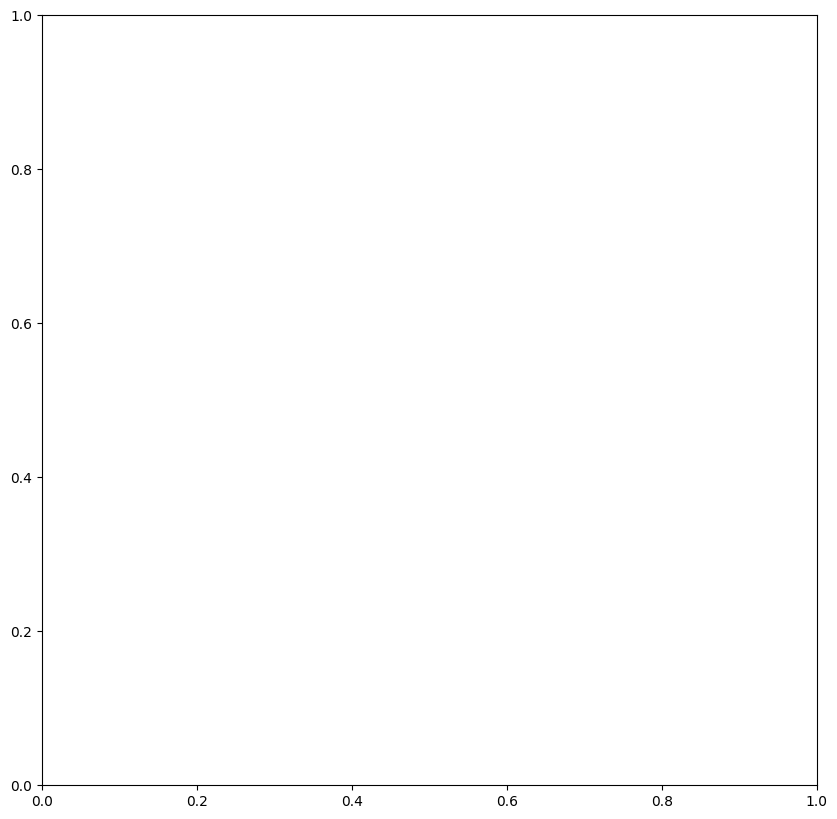

In [76]:
from sklearn.neighbors import BallTree
import numpy as np

# define the path to the shapefile
shape = "./geospatial_files/Townlands_-_National_Statutory_Boundaries_-_2019/Townlands___Ungen_2019.shp"

# read in shapefiles with geopandas
sf = gpd.read_file(shape)

# Check the current CRS (Coordinate Reference System)
print(sf.crs)

# Reproject to Web Mercator (EPSG:3857)
sf = sf.to_crs("EPSG:4326")

# Check the [new] current CRS (Coordinate Reference System)
print(sf.crs)

# read in csv dataset using pandas and create a dataframe
df = pd.read_csv("ire_hospitals.csv")

# create a GeoDataFrame from the dataframe
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Check the current CRS (Coordinate Reference System)
print(df_geo.crs)

# Define the CRS for the hospitals GeoDataFrame (WGS84)
#df_geo.crs = "EPSG:4326"

# Reproject hospitals to Web Mercator (EPSG:3857)
#df_geo = df_geo.to_crs("EPSG:3857")

# calculate the centroids of each polygon in sf_all_ire
#sf['centroid'] = sf['geometry'].centroid

# extract the centroids
#centroids = np.column_stack((sf['centroid'].x, sf['centroid'].y))

# extract the hospital coordinates
#hospital_coords = np.column_stack((df_geo.geometry.x, df_geo.geometry.y))

# create a BallTree with hospital coordinates
#tree = BallTree(hospital_coords, leaf_size=15)

# query the nearest hospital for each centroid
#distances, indices = tree.query(centroids, k=1)

# create a Series with the distances and their corresponding indices
#nearest_distances = pd.Series(distances.ravel(), index=sf.index)

# add the nearest distance as a new column in the GeoDataFrame
#sf['nearest_distance'] = nearest_distances

# plot the map with color based on distance to nearest hospital
fig, ax = plt.subplots(figsize=(10, 10))

# basic map plot
#sf.plot()

# plot the GeoDataFrame with color based on distance
#sf.plot(ax=ax, column='nearest_distance', cmap='hot', legend=True)

# plot the hospitals
#df_geo.plot(ax=ax, color='blue', markersize=10)

plt.show()
